In [1]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np


In [19]:
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.units = ['AU', 'yr', 'Msun']

sim.add(["Sun","Mercury","Venus","Earth","Mars"])

sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne

sim.add(["Jupiter","Saturn","Uranus","Neptune"])
sim.move_to_com()
sim.save("checkpoint.bin")


Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... 

KeyboardInterrupt: 

In [2]:

sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.7.2
REBOUND built on:    	Jan 31 2019 09:37:22
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0010157112973492918 y=0.007488730361825614 z=-5.069533736898837e-05 vx=-0.0029328720427306775 vy=0.0006155424014823996 vz=7.56272178380342e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.318037998169637 y=-0.23925513111096758 z=-0.04948219703090178 vx=4.2567040876537705 vy=8.607331159042683 vz=0.3125908459695051>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7022578873416416 y=-0.15564336442243198 z=0.03817797548211421 vx=1.623166596267045 vy=-7.227832794574069 vz=-0.19294622264815264>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.6769295705265821 y=0.7246579288413936 z=-8.129822623584453e-05 vx=-4.678380415993614 vy=-4.332952208298205 vz=0.000285868887266

In [3]:
sim.status()
#widget = sim.getWidget()
#display(widget)
#sim.integrate(1000)




---------------------------------
REBOUND version:     	3.7.2
REBOUND built on:    	Jan 31 2019 09:37:22
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0010157112973492918 y=0.007488730361825614 z=-5.069533736898837e-05 vx=-0.0029328720427306775 vy=0.0006155424014823996 vz=7.56272178380342e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.318037998169637 y=-0.23925513111096758 z=-0.04948219703090178 vx=4.2567040876537705 vy=8.607331159042683 vz=0.3125908459695051>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7022578873416416 y=-0.15564336442243198 z=0.03817797548211421 vx=1.623166596267045 vy=-7.227832794574069 vz=-0.19294622264815264>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.6769295705265821 y=0.7246579288413936 z=-8.129822623584453e-05 vx=-4.678380415993614 vy=-4.332952208298205 vz=0.000285868887266

In [4]:

Noutputs = 200000
year = 1 # One year in units where G=1
times = np.linspace(0.,+5000.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

In [5]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
    sim.integrate(time)
    x[0][i] = ps[3].x   # Earth This stores the data which allows us to plot it later
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    x[1][i] = ps[5].x   # Cruithne
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


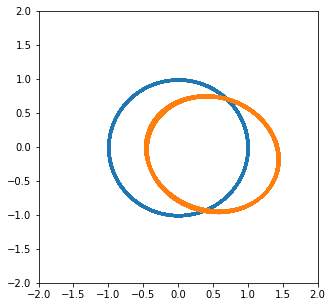

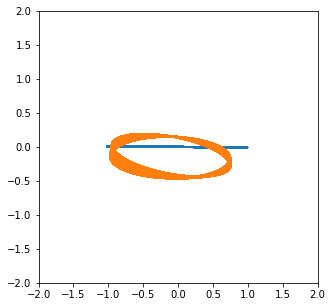

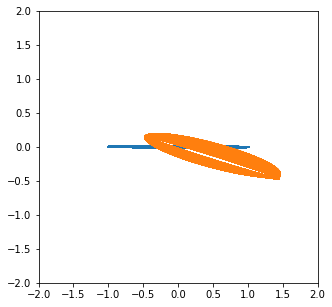

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

fig2 = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(y[0], z[0]);
plt.plot(y[1], z[1]);

fig3 = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[0], z[0]);
plt.plot(x[1], z[1]);

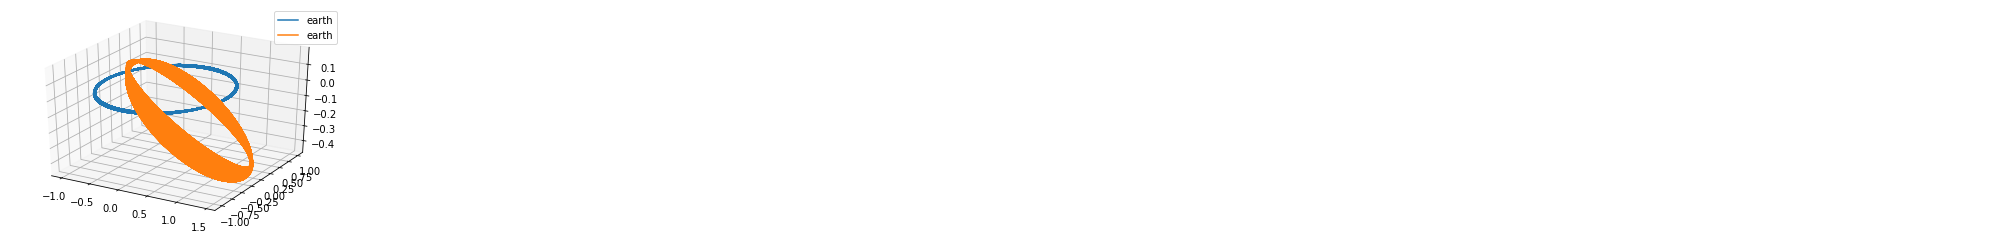

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
# fig.set_figheight(10)
# fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d',s=500)
# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
ax.plot(x[0], y[0], z[0], label='earth')
ax.plot(x[1], y[1], z[1], label='earth')
ax.legend()
fig.savefig("myfig.png", dpi=200)

plt.show()

Minimum distance (0.074250 AU) occured at time: 3921.519608 years.


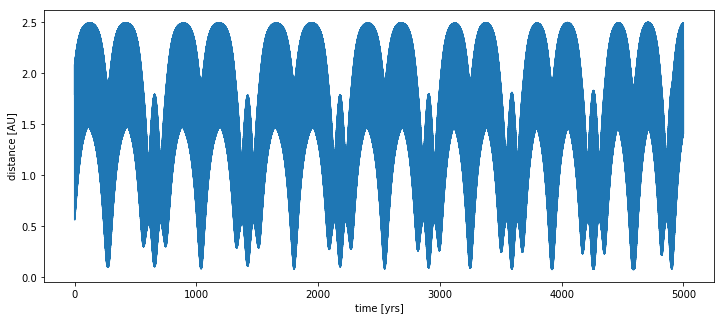

In [9]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

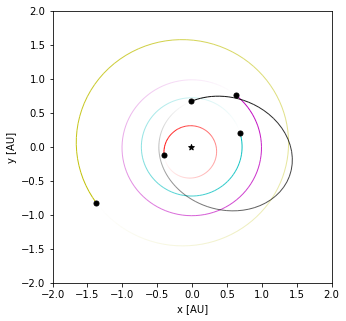

In [ ]:
sim.t = 0
sim.move_to_com()
for time in np.linspace(0,10.,2000):
    #print(time)
    sim.integrate(time)
    #print(sim.calculate_energy())
    fig = rebound.OrbitPlot(sim,color=True,unitlabel="[AU]",lim=2.)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)